#📌 Extracción

In [91]:

import pandas as pd
import requests
import json


url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
datos = response.json()

In [92]:
#Transformar datos en DataFrame
df = pd.DataFrame(datos)
#Visualizar primeros 5 registros
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [93]:
#Visualizar dimensiones de Data
df.shape

(7267, 6)

#🔧 Transformación

In [94]:
#Verificar datos de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [95]:
#Normalización de datos para próximo análisis
response = requests.get(url)
datos = response.json()
df = pd.json_normalize(datos)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [96]:
#Visualizar datos
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [97]:
#Visualización de tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [98]:
#Verificando si hay valores nulos dentro de los datos
df_nulos = df.isnull().sum()
df_nulos

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [99]:
#Valores duplicados
df_duplicados = df.duplicated().sum()
df_duplicados

np.int64(0)

In [100]:
#Encontrar valores vacios por columnas
vacios = (df == '').sum()

In [101]:
vacios = (df == '').sum()
vacios

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [102]:
# Renombrando columnas
columnas = [
    'idCliente',
    'bajaCliente',
    'genero',
    'adultoMayor',
    'tienePareja',
    'tieneDependientes',
    'permanencia',
    'servicioTelefono',
    'lineasMultiples',
    'servicioInternet',
    'seguridadOnline',
    'backupOnline',
    'proteccionDispositivo',
    'soporteTecnico',
    'tvStreaming',
    'peliculaStreaming',
    'tipoContrato',
    'facturaOnline',
    'metodoPago',
    'cargoMensual',
    'cargoTotal'
]

columnas_rename = dict(zip(df.columns, columnas))
df = df.rename(columns=columnas_rename)
df.head()

,idCliente,bajaCliente,genero,adultoMayor,tienePareja,tieneDependientes,permanencia,servicioTelefono,lineasMultiples,servicioInternet,...,backupOnline,proteccionDispositivo,soporteTecnico,tvStreaming,peliculaStreaming,tipoContrato,facturaOnline,metodoPago,cargoMensual,cargoTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [103]:
# Reemplazar espacios vacíos por Nan
import numpy as np

df = df.replace(r'^\s*$', np.nan, regex=True)
df['cargoTotal'] = df['cargoTotal'].astype(np.float64)

# Eliminar registros vacios o nulls

df = df.dropna(subset=['cargoTotal', 'bajaCliente'])
df.isnull().sum()


,0
idCliente,0
bajaCliente,0
genero,0
adultoMayor,0
tienePareja,0
tieneDependientes,0
permanencia,0
servicioTelefono,0
lineasMultiples,0
servicioInternet,0


In [104]:
columnas = list(df.select_dtypes(include='object').columns)

for columna in columnas:
  print(columna, df[columna].unique())

  df['tipoContrato'] = df['tipoContrato'].replace({'One year': '1 año', 'Month-to-month': 'Mensual', 'Two year': '2 años'})
  df['metodoPago'] = df['metodoPago'].replace(
      {'Mailed check': 'Cheque enviado por correo',
       'Electronic check': 'Cheque electronico',
       'Credit card (automatic)': 'Tarjeta de Crédito',
       'Bank transfer (automatic)': 'Transferencia Bancaria'
       })
  df['lineasMultiples'] = df['lineasMultiples'].replace({'No phone service': 'Sin servicio Telefónico'})
  df['seguridadOnline'] = df['seguridadOnline'].replace({'No internet service': 'Sin servicio de Internet'})
  df['backupOnline'] = df['backupOnline'].replace({'No internet service': 'Sin servicio de Internet'})
  df['proteccionDispositivo'] = df['proteccionDispositivo'].replace({'No internet service': 'Sin servicio de Internet'})
  df['soporteTecnico'] = df['soporteTecnico'].replace({'No internet service': 'Sin servicio de Internet'})
  df['tvStreaming'] = df['tvStreaming'].replace({'No internet service': 'Sin servicio de Internet'})
  df['peliculaStreaming'] = df['peliculaStreaming'].replace({'No internet service': 'Sin servicio de Internet'})
  df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})



idCliente ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
bajaCliente ['No' 'Yes']
genero ['Femenino' 'Masculino']
tienePareja ['Yes' 'No']
tieneDependientes ['Yes' 'No']
servicioTelefono ['Yes' 'No']
lineasMultiples ['No' 'Yes' 'Sin servicio Telefónico']
servicioInternet ['DSL' 'Fiber optic' 'No']
seguridadOnline ['No' 'Yes' 'Sin servicio de Internet']
backupOnline ['Yes' 'No' 'Sin servicio de Internet']
proteccionDispositivo ['No' 'Yes' 'Sin servicio de Internet']
soporteTecnico ['Yes' 'No' 'Sin servicio de Internet']
tvStreaming ['Yes' 'No' 'Sin servicio de Internet']
peliculaStreaming ['No' 'Yes' 'Sin servicio de Internet']
tipoContrato ['1 año' 'Mensual' '2 años']
facturaOnline ['Yes' 'No']
metodoPago ['Cheque enviado por correo' 'Cheque electronico' 'Tarjeta de Crédito'
 'Transferencia Bancaria']


In [105]:
#Columna Cuentas_Diarias
df['Cuentas_Diarias'] = (df['cargoMensual'] / 30 )
df

,idCliente,bajaCliente,genero,adultoMayor,tienePareja,tieneDependientes,permanencia,servicioTelefono,lineasMultiples,servicioInternet,...,proteccionDispositivo,soporteTecnico,tvStreaming,peliculaStreaming,tipoContrato,facturaOnline,metodoPago,cargoMensual,cargoTotal,Cuentas_Diarias
0,0002-ORFBO,No,Femenino,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,1 año,Yes,Cheque enviado por correo,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Mensual,No,Cheque enviado por correo,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Mensual,Yes,Cheque electronico,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Mensual,Yes,Cheque electronico,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Femenino,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Mensual,Yes,Cheque enviado por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,1 año,No,Cheque enviado por correo,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Masculino,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Mensual,Yes,Cheque electronico,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Mensual,Yes,Cheque enviado por correo,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,2 años,No,Cheque enviado por correo,67.85,4627.65,2.261667


In [106]:
#Identificando valores Yes / No y Reemplazandolos por 1 y 0
columnas = ['facturaOnline',
     'peliculaStreaming',
     'tvStreaming',
     'soporteTecnico',
     'proteccionDispositivo',
     'backupOnline',
     'seguridadOnline',
     'lineasMultiples',
     'tieneDependientes',
     'tienePareja',
     'adultoMayor',
     'bajaCliente',
     'servicioTelefono'
     ]

df[columnas] = df[columnas].replace({'No': 0, 'Yes': 1}).infer_objects(copy=False)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   idCliente              7032 non-null   object 
 1   bajaCliente            7032 non-null   int64  
 2   genero                 7032 non-null   object 
 3   adultoMayor            7032 non-null   int64  
 4   tienePareja            7032 non-null   int64  
 5   tieneDependientes      7032 non-null   int64  
 6   permanencia            7032 non-null   int64  
 7   servicioTelefono       7032 non-null   int64  
 8   lineasMultiples        7032 non-null   object 
 9   servicioInternet       7032 non-null   object 
 10  seguridadOnline        7032 non-null   object 
 11  backupOnline           7032 non-null   object 
 12  proteccionDispositivo  7032 non-null   object 
 13  soporteTecnico         7032 non-null   object 
 14  tvStreaming            7032 non-null   object 
 15  peliculaS

#📊 Carga y análisis

In [108]:
#Analisis Descriptivo de datos numéricos

columnas_numericas = list(df.select_dtypes(include=(['float64'])).columns)

#Total Clientes

print(f'Total de clientes: {df.shape[0]}')
print(f'Clientes que se dieron de baja :{df['bajaCliente'].sum()}')
print(f'Clientes retenidos :{(df['bajaCliente']==0).sum()}')

print('\n ANALISIS DE DATOS NUMERICOS')
print(f'\n{df[columnas_numericas].describe()}')


print('\nANALISIS DE DATOS CATEGORICOS')

print('\nGENERO')
print(f'\n{df["genero"].value_counts()}')

print('\nADULTOS MAYORES')
print(f'\n{df["adultoMayor"].value_counts()}')


Total de clientes: 7032
Clientes que se dieron de baja :1869
Clientes retenidos :5163

 ANALISIS DE DATOS NUMERICOS

       cargoMensual   cargoTotal  Cuentas_Diarias
count   7032.000000  7032.000000      7032.000000
mean      64.798208  2283.300441         2.159940
std       30.085974  2266.771362         1.002866
min       18.250000    18.800000         0.608333
25%       35.587500   401.450000         1.186250
50%       70.350000  1397.475000         2.345000
75%       89.862500  3794.737500         2.995417
max      118.750000  8684.800000         3.958333

ANALISIS DE DATOS CATEGORICOS

GENERO

genero
Masculino    3549
Femenino     3483
Name: count, dtype: int64

ADULTOS MAYORES

adultoMayor
0    5890
1    1142
Name: count, dtype: int64


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
import warnings

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(20, 28))
fig.suptitle('ANÁLISIS DESCRIPTIVO COMPLETO - TelecomX',
             fontsize=24, fontweight='bold', y=0.98)



Text(0.5, 0.98, 'ANÁLISIS DESCRIPTIVO COMPLETO - TelecomX')

<Figure size 2000x2800 with 0 Axes>

(0.0, 4081.35)

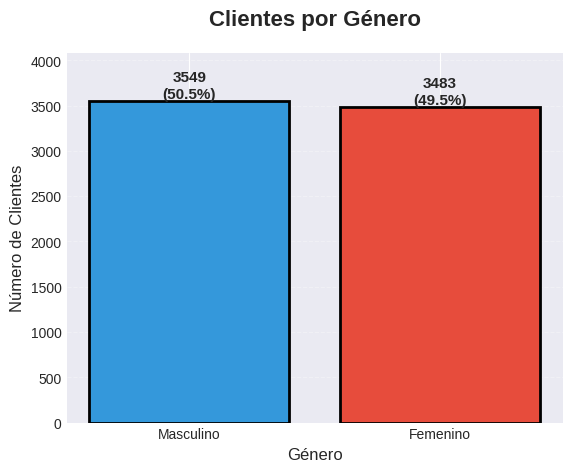

In [110]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

conteo_genero = df['genero'].value_counts()
# Definir colores y etiquetas
colores = ['#3498db', '#e74c3c']
etiquetas = conteo_genero.index.tolist()

# Crear gráfico de barras
barras = plt.bar(etiquetas, conteo_genero.values, color=colores, edgecolor='black', linewidth=2)

# Personalizar el gráfico
plt.title('Clientes por Género', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores en las barras
for barra in barras:
  altura = barra.get_height()
  porcentaje = (altura / len(df)) * 100
  plt.text(barra.get_x() + barra.get_width()/2., altura + 5,
           f'{int(altura)}\n({porcentaje:.1f}%)',
           ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.ylim(0, max(conteo_genero.values) * 1.15)

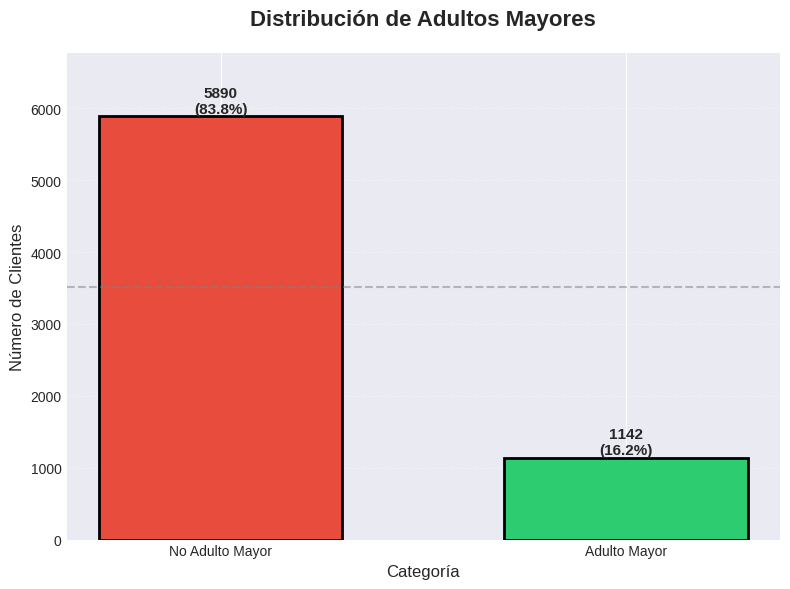

In [111]:
conteo_adulto = df['adultoMayor'].value_counts().sort_index()

# Mapear 0 y 1 a etiquetas más descriptivas
etiquetas_map = {0: 'No Adulto Mayor', 1: 'Adulto Mayor'}
etiquetas = [etiquetas_map.get(x, str(x)) for x in conteo_adulto.index]

# Definir colores
colores = ['#e74c3c', '#2ecc71']  # Rojo para No, Verde para Sí

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(etiquetas, conteo_adulto.values, color=colores,
                     edgecolor='black', linewidth=2, width=0.6)

# Personalizar el gráfico
plt.title('Distribución de Adultos Mayores', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores en las barras
for barra in barras:
  altura = barra.get_height()
  porcentaje = (altura / len(df)) * 100
  plt.text(barra.get_x() + barra.get_width()/2., altura + 5,
           f'{int(altura)}\n({porcentaje:.1f}%)',
           ha='center', va='bottom', fontsize=11, fontweight='bold')

# Ajustar límites del eje Y
plt.ylim(0, max(conteo_adulto.values) * 1.15)

# Añadir línea horizontal para el promedio
promedio_total = len(df) / 2
plt.axhline(y=promedio_total, color='gray', linestyle='--', alpha=0.5,
            label='Promedio esperado')

plt.tight_layout()
plt.show()

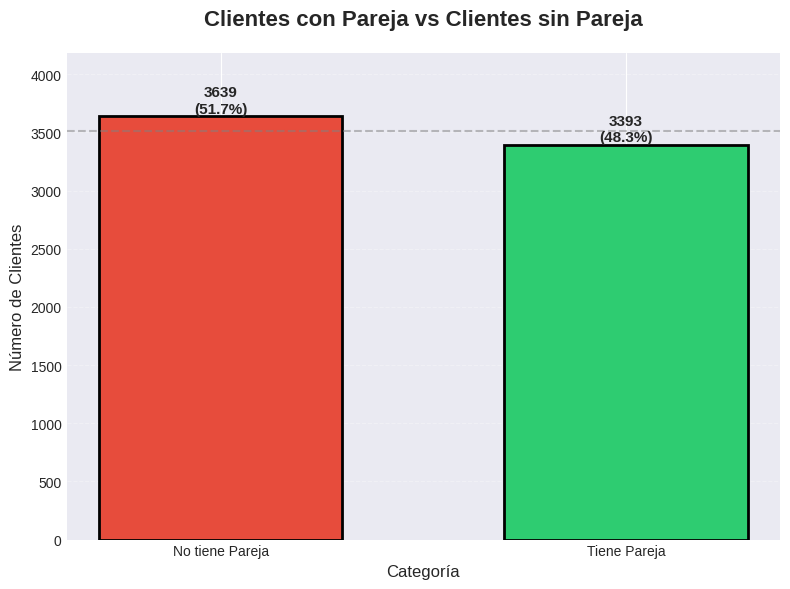

In [112]:
conteo_pareja = df['tienePareja'].value_counts().sort_index()

# Mapear 0 y 1 a etiquetas más descriptivas
etiquetas_map = {0: 'No tiene Pareja', 1: 'Tiene Pareja'}
etiquetas = [etiquetas_map.get(x, str(x)) for x in conteo_pareja.index]

# Definir colores
colores = ['#e74c3c', '#2ecc71']

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(etiquetas, conteo_pareja.values, color=colores,
                     edgecolor='black', linewidth=2, width=0.6)

# Personalizar el gráfico
plt.title('Clientes con Pareja vs Clientes sin Pareja', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores en las barras
for barra in barras:
  altura = barra.get_height()
  porcentaje = (altura / len(df)) * 100
  plt.text(barra.get_x() + barra.get_width()/2., altura + 5,
           f'{int(altura)}\n({porcentaje:.1f}%)',
           ha='center', va='bottom', fontsize=11, fontweight='bold')

# Ajustar límites del eje Y
plt.ylim(0, max(conteo_pareja.values) * 1.15)

# Añadir línea horizontal para el promedio
promedio_total = len(df) / 2
plt.axhline(y=promedio_total, color='gray', linestyle='--', alpha=0.5,
            label='Promedio esperado')

plt.tight_layout()
plt.show()

Clientes CON pareja: 3,393 (48.3%)
  • Bajas: 669
  • Retenidos: 2,724

Clientes SIN pareja: 3,639 (51.7%)
  • Bajas: 1,200 
  • Retenidos: 2,439


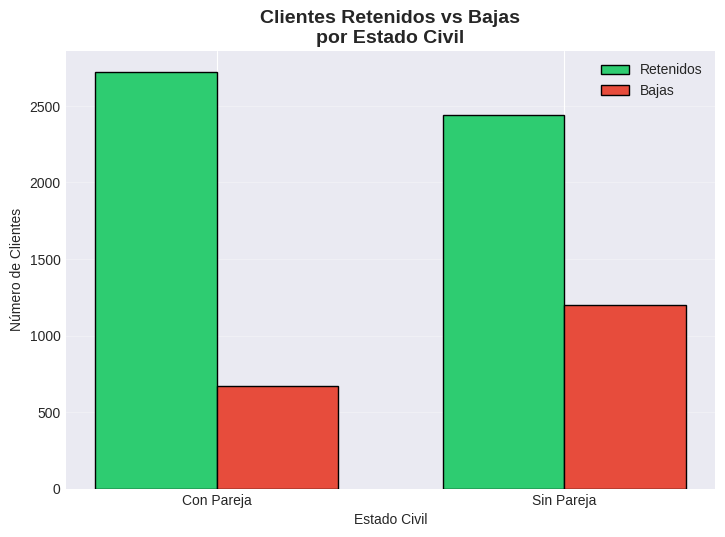

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['tienePareja'], df['bajaCliente'])

# Mapear valores a etiquetas
tiene_pareja_labels = {0: 'Sin Pareja', 1: 'Con Pareja'}
baja_labels = {0: 'Retenidos', 1: 'Bajas'}

# Renombrar índices y columnas para mejor visualización
tabla_contingencia_renamed = tabla_contingencia.rename(
        index=tiene_pareja_labels,
        columns=baja_labels
)
# Clientes con pareja
clientes_con_pareja = df[df['tienePareja'] == 1]
bajas_con_pareja = clientes_con_pareja[clientes_con_pareja['bajaCliente'] == 1]


# Clientes sin pareja
clientes_sin_pareja = df[df['tienePareja'] == 0]
bajas_sin_pareja = clientes_sin_pareja[clientes_sin_pareja['bajaCliente'] == 1]


print(f"Clientes CON pareja: {len(clientes_con_pareja):,} ({len(clientes_con_pareja)/len(df)*100:.1f}%)")
print(f"  • Bajas: {len(bajas_con_pareja):,}")
print(f"  • Retenidos: {len(clientes_con_pareja)-len(bajas_con_pareja):,}")

print(f"\nClientes SIN pareja: {len(clientes_sin_pareja):,} ({len(clientes_sin_pareja)/len(df)*100:.1f}%)")
print(f"  • Bajas: {len(bajas_sin_pareja):,} ")
print(f"  • Retenidos: {len(clientes_sin_pareja)-len(bajas_sin_pareja):,}")


plt.figure(figsize=(14, 10))

# Subplot 1: Gráfico de barras agrupado
ax1 = plt.subplot(2, 2, 1)

# Preparar datos para gráfico de barras agrupado
x = np.arange(2)  # Dos grupos: Con pareja y Sin pareja
width = 0.35

# Datos para barras
retenidos = [
    len(clientes_con_pareja) - len(bajas_con_pareja),
    len(clientes_sin_pareja) - len(bajas_sin_pareja)
]

bajas = [
    len(bajas_con_pareja),
    len(bajas_sin_pareja)
]

# Crear barras
bars1 = ax1.bar(x - width/2, retenidos, width, label='Retenidos', color='#2ecc71', edgecolor='black')
bars2 = ax1.bar(x + width/2, bajas, width, label='Bajas', color='#e74c3c', edgecolor='black')

# Personalizar
ax1.set_title('Clientes Retenidos vs Bajas\npor Estado Civil', fontsize=14, fontweight='bold')
ax1.set_xlabel('Estado Civil')
ax1.set_ylabel('Número de Clientes')
ax1.set_xticks(x)
ax1.set_xticklabels(['Con Pareja', 'Sin Pareja'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Clientes Adultos Mayores: 1,142 (16.2%)
  • Bajas: 476
  • Retenidos: 666

Clientes No Adultos Mayores: 5,890 (83.8%)
  • Bajas: 1,393 
  • Retenidos: 4,497


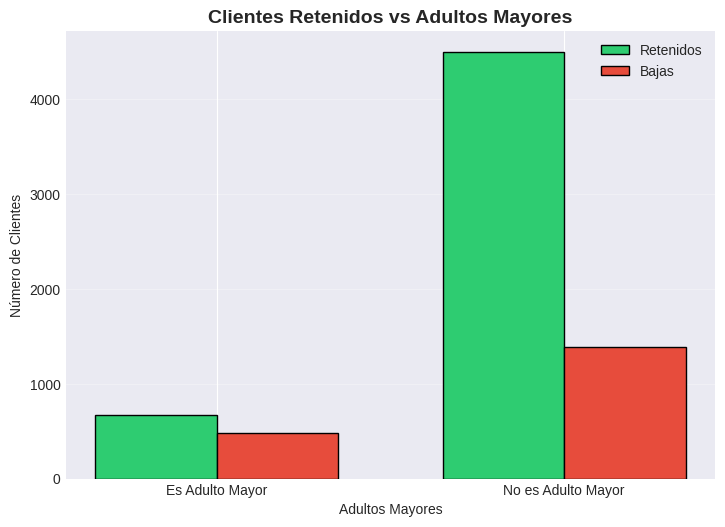

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['adultoMayor'], df['bajaCliente'])

# Mapear valores a etiquetas
adultoMayor_labels = {0: 'No es Adulto Mayor', 1: 'Es adulto mayor'}
baja_labels = {0: 'Retenidos', 1: 'Bajas'}

# Renombrar índices y columnas para mejor visualización
tabla_contingencia_renamed = tabla_contingencia.rename(
        index=adultoMayor_labels,
        columns=baja_labels
)
# Clientes con pareja
esAdultoMayor = df[df['adultoMayor'] == 1]
bajas_adulto = esAdultoMayor[esAdultoMayor['bajaCliente'] == 1]


# Clientes sin pareja
noEsAdultoMayor = df[df['adultoMayor'] == 0]
bajas_no_adulto = noEsAdultoMayor[noEsAdultoMayor['bajaCliente'] == 1]


print(f"Clientes Adultos Mayores: {len(esAdultoMayor):,} ({len(esAdultoMayor)/len(df)*100:.1f}%)")
print(f"  • Bajas: {len(bajas_adulto):,}")
print(f"  • Retenidos: {len(esAdultoMayor)-len(bajas_adulto):,}")

print(f"\nClientes No Adultos Mayores: {len(noEsAdultoMayor):,} ({len(noEsAdultoMayor)/len(df)*100:.1f}%)")
print(f"  • Bajas: {len(bajas_no_adulto):,} ")
print(f"  • Retenidos: {len(noEsAdultoMayor)-len(bajas_no_adulto):,}")


plt.figure(figsize=(14, 10))

# Subplot 1: Gráfico de barras agrupado
ax1 = plt.subplot(2, 2, 1)

# Preparar datos para gráfico de barras agrupado
x = np.arange(2)  # Dos grupos: Con pareja y Sin pareja
width = 0.35

# Datos para barras
retenidos = [
    len(esAdultoMayor) - len(bajas_adulto),
    len(noEsAdultoMayor) - len(bajas_no_adulto)
]

bajas = [
    len(bajas_adulto),
    len(bajas_no_adulto)
]

# Crear barras
bars1 = ax1.bar(x - width/2, retenidos, width, label='Retenidos', color='#2ecc71', edgecolor='black')
bars2 = ax1.bar(x + width/2, bajas, width, label='Bajas', color='#e74c3c', edgecolor='black')

# Personalizar
ax1.set_title('Clientes Retenidos vs Adultos Mayores', fontsize=14, fontweight='bold')
ax1.set_xlabel('Adultos Mayores')
ax1.set_ylabel('Número de Clientes')
ax1.set_xticks(x)
ax1.set_xticklabels(['Es Adulto Mayor', 'No es Adulto Mayor'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


ANÁLISIS: TIPO DE CONTRATO VS BAJAS DE CLIENTES
bajaCliente   Retenidos  Bajas
tipoContrato                  
1 año              1306    166
2 años             1637     48
Mensual            2220   1655

ESTADÍSTICAS POR TIPO DE CONTRATO:

1 año:
  • Total clientes: 1,472 (20.9%)
  • Bajas: 166 (11.3%)
  • Retenidos: 1,306 (88.7%)

Mensual:
  • Total clientes: 3,875 (55.1%)
  • Bajas: 1,655 (42.7%)
  • Retenidos: 2,220 (57.3%)

2 años:
  • Total clientes: 1,685 (24.0%)
  • Bajas: 48 (2.8%)
  • Retenidos: 1,637 (97.2%)


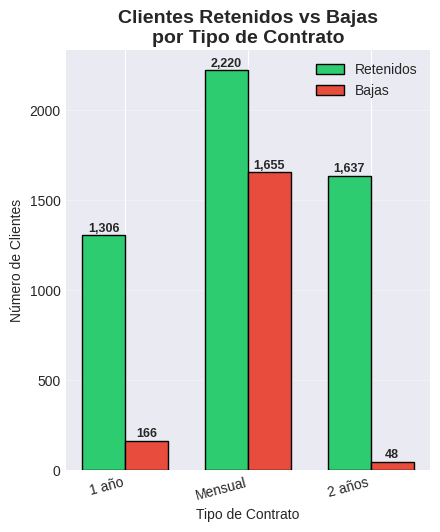

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['tipoContrato'], df['bajaCliente'])

# Renombrar columnas para mejor visualización
tabla_contingencia_renamed = tabla_contingencia.rename(
    columns={0: 'Retenidos', 1: 'Bajas'}
)

print("=" * 60)
print("ANÁLISIS: TIPO DE CONTRATO VS BAJAS DE CLIENTES")
print("=" * 60)

print(tabla_contingencia_renamed)

# Calcular estadísticas por tipo de contrato
print("\nESTADÍSTICAS POR TIPO DE CONTRATO:")

tipos_contrato = df['tipoContrato'].unique()

for tipo in tipos_contrato:
        clientes_tipo = df[df['tipoContrato'] == tipo]
        bajas_tipo = clientes_tipo[clientes_tipo['bajaCliente'] == 1]
        porcentaje_bajas = (len(bajas_tipo) / len(clientes_tipo)) * 100

        print(f"\n{tipo}:")
        print(f"  • Total clientes: {len(clientes_tipo):,} ({len(clientes_tipo)/len(df)*100:.1f}%)")
        print(f"  • Bajas: {len(bajas_tipo):,} ({porcentaje_bajas:.1f}%)")
        print(f"  • Retenidos: {len(clientes_tipo)-len(bajas_tipo):,} ({100-porcentaje_bajas:.1f}%)")

plt.figure(figsize=(16, 12))

#Gráfico
ax1 = plt.subplot(2, 3, 1)

# Preparar datos
n_tipos = len(tipos_contrato)
x = np.arange(n_tipos)
width = 0.35

# Calcular retenidos y bajas por tipo
retenidos = []
bajas = []

for tipo in tipos_contrato:
        clientes_tipo = df[df['tipoContrato'] == tipo]
        bajas_tipo = clientes_tipo[clientes_tipo['bajaCliente'] == 1]

        retenidos.append(len(clientes_tipo) - len(bajas_tipo))
        bajas.append(len(bajas_tipo))

# Crear barras
bars1 = ax1.bar(x - width/2, retenidos, width, label='Retenidos', color='#2ecc71', edgecolor='black')
bars2 = ax1.bar(x + width/2, bajas, width, label='Bajas', color='#e74c3c', edgecolor='black')

# Personalizar
ax1.set_title('Clientes Retenidos vs Bajas\npor Tipo de Contrato', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Contrato')
ax1.set_ylabel('Número de Clientes')
ax1.set_xticks(x)
ax1.set_xticklabels(tipos_contrato, rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
def autolabel(bars, ax):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{int(height):,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

autolabel(bars1, ax1)
autolabel(bars2, ax1)


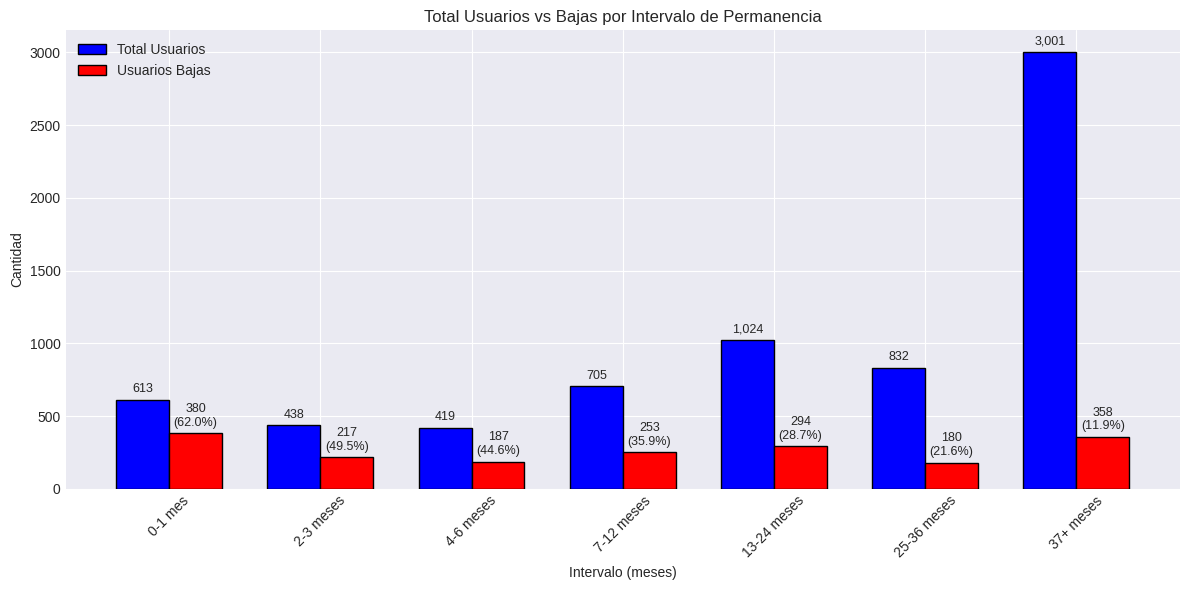

0-1 mes: 613 usuarios, 380 bajas
2-3 meses: 438 usuarios, 217 bajas
4-6 meses: 419 usuarios, 187 bajas
7-12 meses: 705 usuarios, 253 bajas
13-24 meses: 1,024 usuarios, 294 bajas
25-36 meses: 832 usuarios, 180 bajas
37+ meses: 3,001 usuarios, 358 bajas


In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Intervalos
rangos = [
    (0, 1, "0-1 mes"),
    (2, 3, "2-3 meses"),
    (4, 6, "4-6 meses"),
    (7, 12, "7-12 meses"),
    (13, 24, "13-24 meses"),
    (25, 36, "25-36 meses"),
    (37, 1000, "37+ meses")  # 1000 es un número grande para capturar todos
]

# Calcular datos
labels = []
total_usuarios = []
usuarios_baja = []

for rango_min, rango_max, label in rangos:
    usuarios = df[(df['permanencia'] >= rango_min) & (df['permanencia'] <= rango_max)]
    if len(usuarios) > 0:
        total = len(usuarios)
        bajas = usuarios[usuarios['bajaCliente'] == 1].shape[0]

        labels.append(label)
        total_usuarios.append(total)
        usuarios_baja.append(bajas)

# Gráfico simple
plt.figure(figsize=(12, 6))

x = np.arange(len(labels))
width = 0.35

# Barras separadas
plt.bar(x - width/2, total_usuarios, width, label='Total Usuarios', color='blue', edgecolor='black')
plt.bar(x + width/2, usuarios_baja, width, label='Usuarios Bajas', color='red', edgecolor='black')

plt.title('Total Usuarios vs Bajas por Intervalo de Permanencia')
plt.xlabel('Intervalo (meses)')
plt.ylabel('Cantidad')
plt.xticks(x, labels, rotation=45)
plt.legend()

for i in range(len(labels)):
    # Texto para total usuarios (
    plt.text(i - width/2, total_usuarios[i] + max(total_usuarios)*0.01,
            f'{total_usuarios[i]:,}', ha='center', va='bottom', fontsize=9)

    # Calcular porcentaje de bajas
    porcentaje = (usuarios_baja[i] / total_usuarios[i]) * 100

    # Texto para usuarios con baja
    plt.text(i + width/2, usuarios_baja[i] + max(total_usuarios)*0.01,
            f'{usuarios_baja[i]:,}\n({porcentaje:.1f}%)',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Imprimir datos
for i, label in enumerate(labels):
    print(f"{label}: {total_usuarios[i]:,} usuarios, {usuarios_baja[i]:,} bajas")

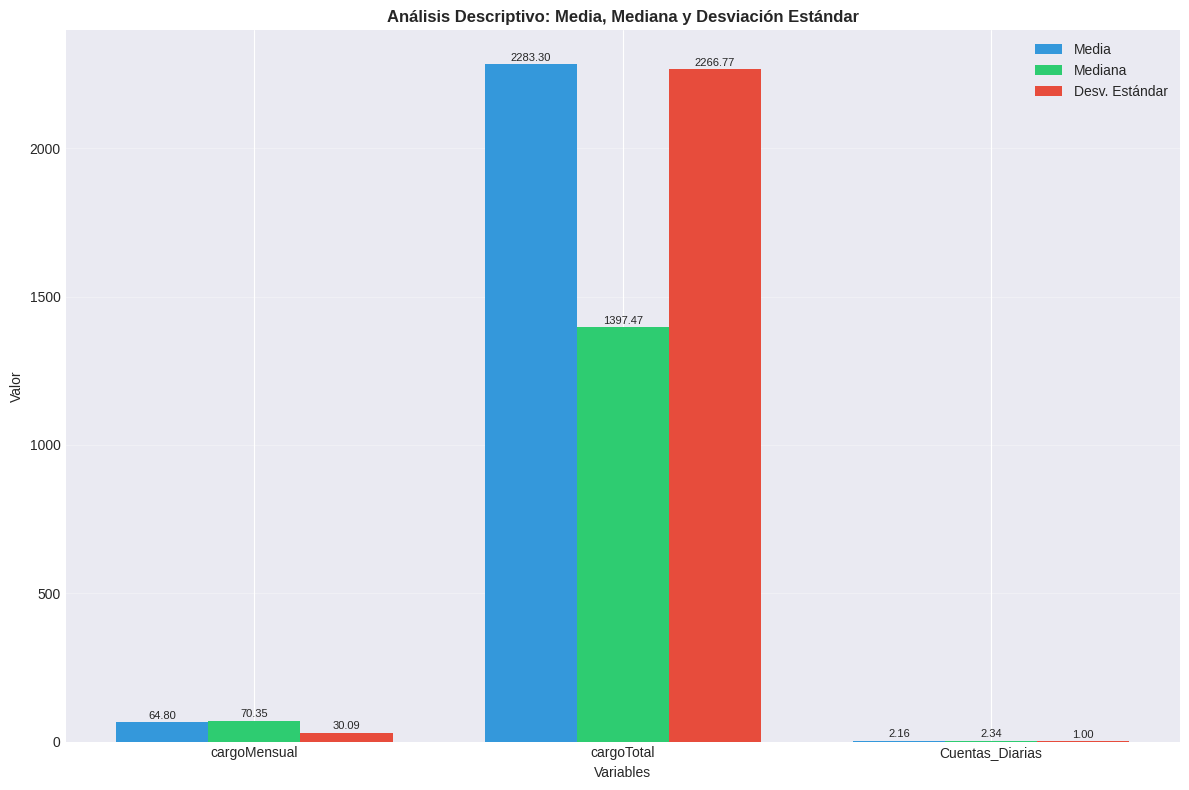


TABLA DE ESTADÍSTICAS:
------------------------------------------------------------
Variable             Media    Mediana  Desv. Estándar
------------------------------------------------------------
cargoMensual         64.80      70.35           30.09
cargoTotal         2283.30    1397.47         2266.77
Cuentas_Diarias       2.16       2.34            1.00


In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Tomar solo las 4 variables numéricas más importantes
variables_importantes = ['cargoMensual', 'cargoTotal', 'Cuentas_Diarias']
variables_importantes = [v for v in variables_importantes if v in df.columns]

# Calcular estadísticas
estadisticas = {
    'Media': [],
    'Mediana': [],
    'Desv. Estándar': []
}

for var in variables_importantes:
    datos = df[var].dropna()
    estadisticas['Media'].append(datos.mean())
    estadisticas['Mediana'].append(datos.median())
    estadisticas['Desv. Estándar'].append(datos.std())

# Gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(variables_importantes))
width = 0.25

# Crear barras
bars1 = ax.bar(x - width, estadisticas['Media'], width, label='Media', color='#3498db')
bars2 = ax.bar(x, estadisticas['Mediana'], width, label='Mediana', color='#2ecc71')
bars3 = ax.bar(x + width, estadisticas['Desv. Estándar'], width, label='Desv. Estándar', color='#e74c3c')

# Configurar
ax.set_title('Análisis Descriptivo: Media, Mediana y Desviación Estándar', fontweight='bold')
ax.set_xlabel('Variables')
ax.set_ylabel('Valor')
ax.set_xticks(x)
ax.set_xticklabels(variables_importantes)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Añadir valores
def agregar_valores(bars):
    for bar in bars:
        altura = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., altura + 5,
               f'{altura:.2f}', ha='center', va='bottom', fontsize=8)

agregar_valores(bars1)
agregar_valores(bars2)
agregar_valores(bars3)

plt.tight_layout()
plt.show()

# Tabla simple
print("\nTABLA DE ESTADÍSTICAS:")
print("-" * 60)
print(f"{'Variable':<15} {'Media':>10} {'Mediana':>10} {'Desv. Estándar':>15}")
print("-" * 60)
for i, var in enumerate(variables_importantes):
    print(f"{var:<15} {estadisticas['Media'][i]:>10.2f} {estadisticas['Mediana'][i]:>10.2f} {estadisticas['Desv. Estándar'][i]:>15.2f}")

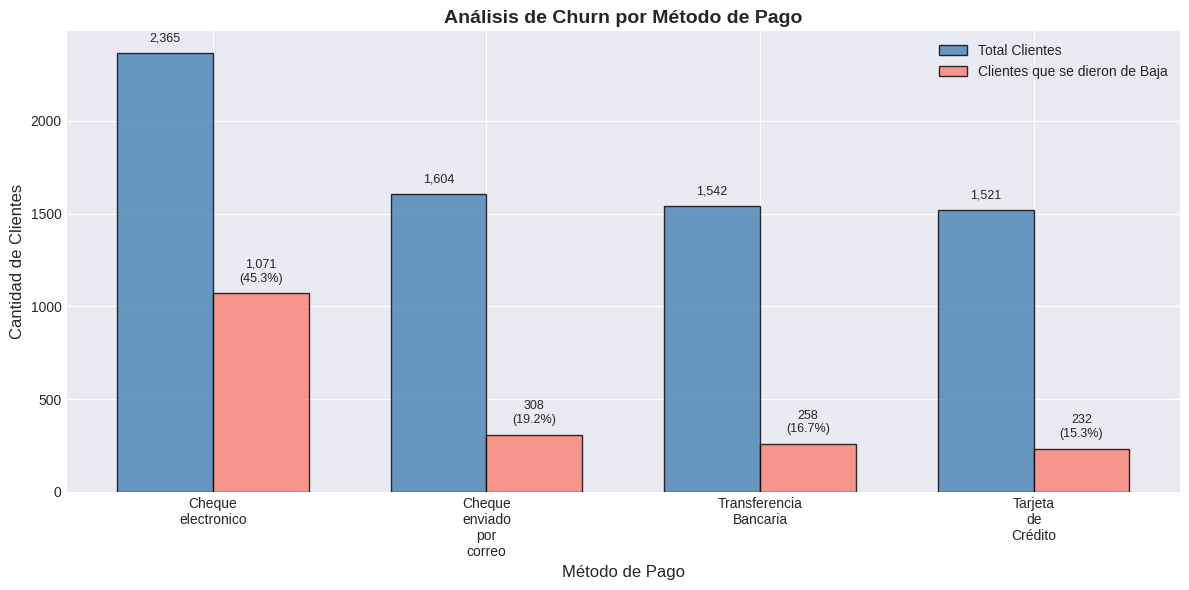

=== ANÁLISIS MÉTODOS DE PAGO ===
Cheque electronico: 2,365 clientes | 1,071 bajas | 45.3% churn
Cheque enviado por correo: 1,604 clientes | 308 bajas | 19.2% churn
Transferencia Bancaria: 1,542 clientes | 258 bajas | 16.7% churn
Tarjeta de Crédito: 1,521 clientes | 232 bajas | 15.3% churn


In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Análisis de métodos de pago vs churn
metodos = df['metodoPago'].value_counts().index.tolist()
total_por_metodo = []
churn_por_metodo = []
porcentaje_churn = []

for metodo in metodos:
    total = df[df['metodoPago'] == metodo].shape[0]
    churn = df[(df['metodoPago'] == metodo) & (df['bajaCliente'] == 1)].shape[0]
    total_por_metodo.append(total)
    churn_por_metodo.append(churn)
    porcentaje_churn.append((churn/total)*100)

# Gráfico
plt.figure(figsize=(12, 6))
x = np.arange(len(metodos))
width = 0.35

# Barras
plt.bar(x - width/2, total_por_metodo, width, label='Total Clientes', color='steelblue', alpha=0.8, edgecolor='black')
plt.bar(x + width/2, churn_por_metodo, width, label='Clientes que se dieron de Baja', color='salmon', alpha=0.8, edgecolor='black')

# Personalización
plt.title('Análisis de Churn por Método de Pago', fontsize=14, fontweight='bold')
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(x, [m.replace(' ', '\n') for m in metodos], rotation=0, fontsize=10)
plt.legend()

# Agregar valores
for i in range(len(metodos)):
    # Total
    plt.text(i - width/2, total_por_metodo[i] + max(total_por_metodo)*0.02,
             f'{total_por_metodo[i]:,}', ha='center', va='bottom', fontsize=9)

    # Churn con porcentaje
    plt.text(i + width/2, churn_por_metodo[i] + max(total_por_metodo)*0.02,
             f'{churn_por_metodo[i]:,}\n({porcentaje_churn[i]:.1f}%)',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Imprimir insights
print("=== ANÁLISIS MÉTODOS DE PAGO ===")
for i, metodo in enumerate(metodos):
    print(f"{metodo}: {total_por_metodo[i]:,} clientes | {churn_por_metodo[i]:,} bajas | {porcentaje_churn[i]:.1f}% churn")

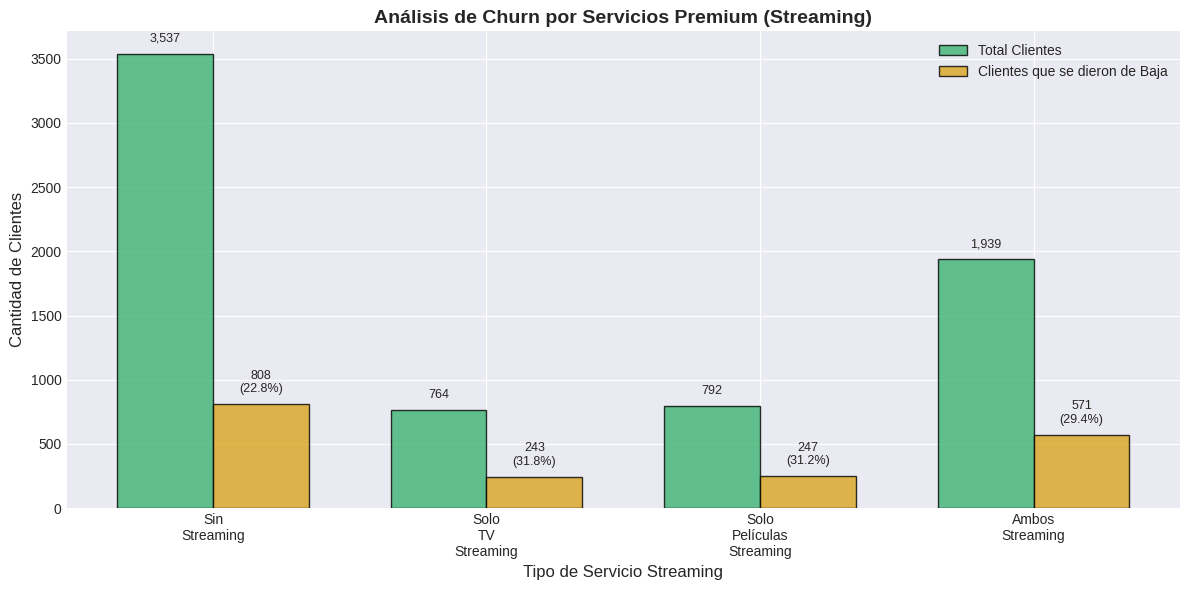


=== ANÁLISIS SERVICIOS STREAMING ===
Sin Streaming: 3,537 clientes | 808 bajas | 22.8
Solo TV Streaming: 764 clientes | 243 bajas | 31.8
Solo Películas Streaming: 792 clientes | 247 bajas | 31.2
Ambos Streaming: 1,939 clientes | 571 bajas | 29.4


In [119]:
# Análisis de servicios premium vs churn
# Crear categorías combinadas de servicios
df['servicios_premium'] = 'Sin Streaming'
df.loc[(df['tvStreaming'] == 1) & (df['peliculaStreaming'] == 0), 'servicios_premium'] = 'Solo TV Streaming'
df.loc[(df['tvStreaming'] == 0) & (df['peliculaStreaming'] == 1), 'servicios_premium'] = 'Solo Películas Streaming'
df.loc[(df['tvStreaming'] == 1) & (df['peliculaStreaming'] == 1), 'servicios_premium'] = 'Ambos Streaming'

# Ordenar categorías
categorias = ['Sin Streaming', 'Solo TV Streaming', 'Solo Películas Streaming', 'Ambos Streaming']
total_por_cat = []
churn_por_cat = []
porcentaje_churn_cat = []

for categoria in categorias:
    total = df[df['servicios_premium'] == categoria].shape[0]
    churn = df[(df['servicios_premium'] == categoria) & (df['bajaCliente'] == 1)].shape[0]
    total_por_cat.append(total)
    churn_por_cat.append(churn)
    porcentaje_churn_cat.append((churn/total)*100 if total > 0 else 0)

# Gráfico 2: Servicios Premium
plt.figure(figsize=(12, 6))
x2 = np.arange(len(categorias))
width = 0.35

# Barras
bars1 = plt.bar(x2 - width/2, total_por_cat, width, label='Total Clientes',
                color='mediumseagreen', alpha=0.8, edgecolor='black')
bars2 = plt.bar(x2 + width/2, churn_por_cat, width, label='Clientes que se dieron de Baja',
                color='goldenrod', alpha=0.8, edgecolor='black')

# Personalización
plt.title('Análisis de Churn por Servicios Premium (Streaming)', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Servicio Streaming', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(x2, [cat.replace(' ', '\n') for cat in categorias], rotation=0, fontsize=10)
plt.legend()

# Agregar valores
for i in range(len(categorias)):
    # Total
    plt.text(i - width/2, total_por_cat[i] + max(total_por_cat)*0.02,
             f'{total_por_cat[i]:,}', ha='center', va='bottom', fontsize=9)

    # Churn con porcentaje
    plt.text(i + width/2, churn_por_cat[i] + max(total_por_cat)*0.02,
             f'{churn_por_cat[i]:,}\n({porcentaje_churn_cat[i]:.1f}%)',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Imprimir insights
print("\n=== ANÁLISIS SERVICIOS STREAMING ===")
for i, categoria in enumerate(categorias):
    print(f"{categoria}: {total_por_cat[i]:,} clientes | {churn_por_cat[i]:,} bajas | {porcentaje_churn_cat[i]:.1f}")

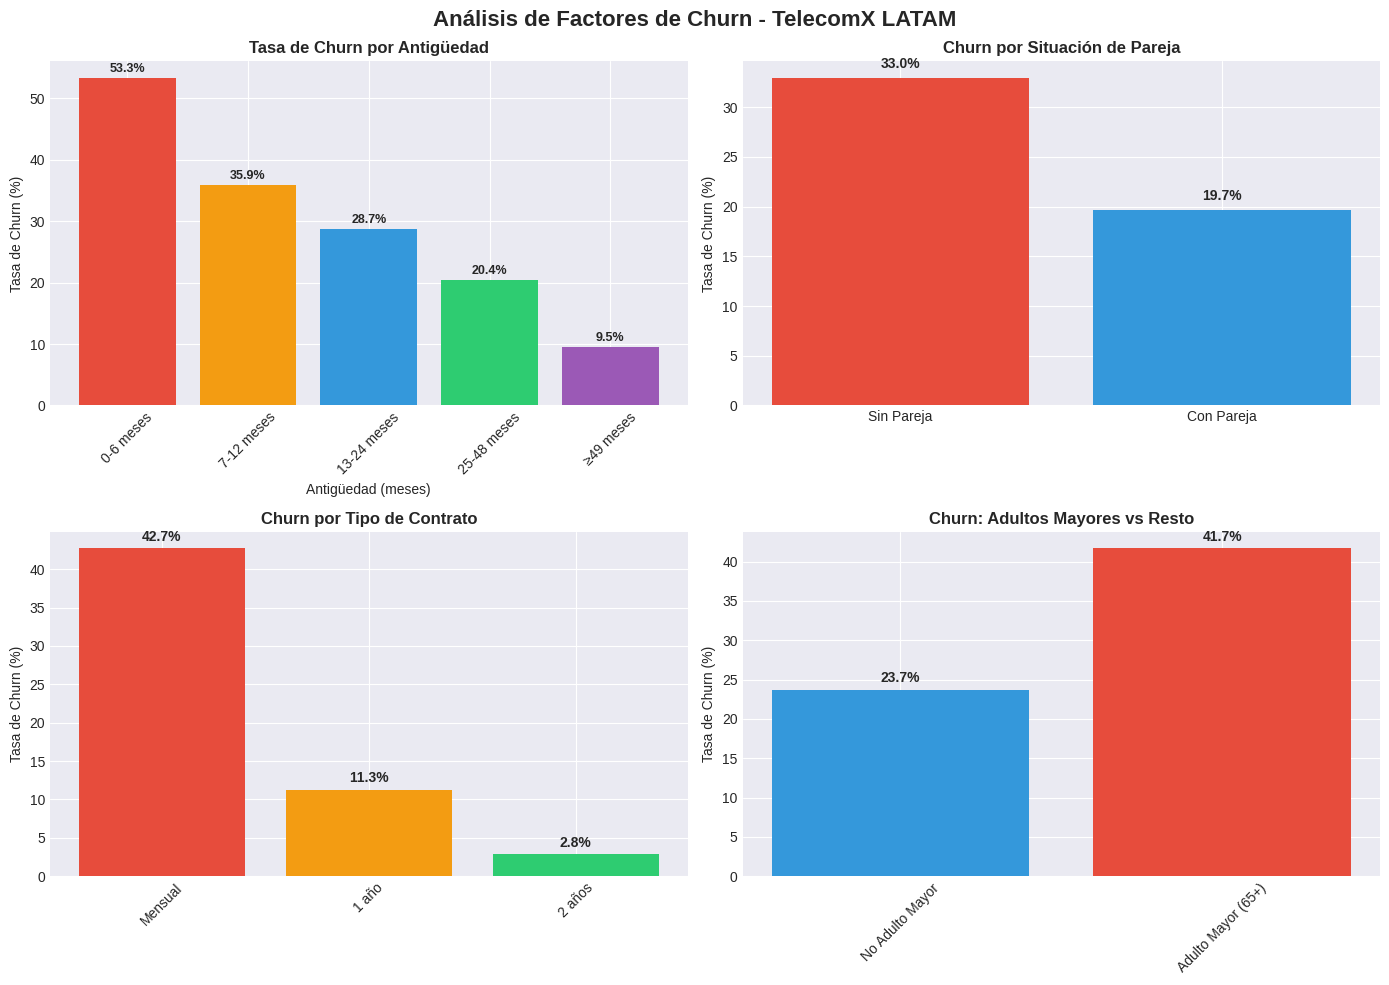

In [120]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Estadísticas de antigüedad
antiguedad_desertores = df[df['bajaCliente'] == 1]['permanencia'].describe()
antiguedad_total = df['permanencia'].describe()

# Crear DataFrame comparativo
data_antiguedad = {
    'Categoría': ['Desertores', 'Total Clientes'],
    'Media (meses)': [antiguedad_desertores['mean'], antiguedad_total['mean']],
    'Mediana (meses)': [antiguedad_desertores['50%'], antiguedad_total['50%']],
    'Mínimo (meses)': [antiguedad_desertores['min'], antiguedad_total['min']],
    'Máximo (meses)': [antiguedad_desertores['max'], antiguedad_total['max']]
}

df_antiguedad_estadisticas = pd.DataFrame(data_antiguedad)

# Definir tramos
tramos = [
    (0, 6, '0-6 meses'),
    (7, 12, '7-12 meses'),
    (13, 24, '13-24 meses'),
    (25, 48, '25-48 meses'),
    (49, 1000, '≥49 meses')
]

tasa_churn_tramos = []

for min_meses, max_meses, nombre in tramos:
    # Filtrar clientes en este tramo
    clientes_tramo = df[(df['permanencia'] >= min_meses) & (df['permanencia'] <= max_meses)]
    total_clientes = len(clientes_tramo)

    if total_clientes > 0:
        desertores_tramo = clientes_tramo[clientes_tramo['bajaCliente'] == 1]
        tasa_churn = len(desertores_tramo) / total_clientes * 100

        tasa_churn_tramos.append({
            'Periodo': nombre,
            'Clientes': total_clientes,
            'Desertores': len(desertores_tramo),
            'Tasa Churn (%)': tasa_churn
        })

df_tramos_churn = pd.DataFrame(tasa_churn_tramos)

correlacion = df['permanencia'].corr(df['bajaCliente'])


# Del notebook: genero tiene 'Masculino' y 'Femenino'
churn_genero = df.groupby('genero')['bajaCliente'].agg(['count', 'sum']).reset_index()
churn_genero['Tasa Churn (%)'] = churn_genero['sum'] / churn_genero['count'] * 100

churn_genero.columns = ['Género', 'Total Clientes', 'Desertores', 'Tasa Churn (%)']

# Del notebook: adultoMayor tiene 0 y 1 (0 = No, 1 = Sí)
churn_adultos = df.groupby('adultoMayor')['bajaCliente'].agg(['count', 'sum']).reset_index()
churn_adultos['Tasa Churn (%)'] = churn_adultos['sum'] / churn_adultos['count'] * 100

# Mapear valores
churn_adultos['Grupo'] = churn_adultos['adultoMayor'].map({0: 'No Adulto Mayor', 1: 'Adulto Mayor (65+)'})
churn_adultos = churn_adultos[['Grupo', 'count', 'sum', 'Tasa Churn (%)']]
churn_adultos.columns = ['Grupo', 'Total Clientes', 'Desertores', 'Tasa Churn (%)']

# Del notebook: tienePareja tiene 0 y 1 (0 = No, 1 = Sí)
churn_pareja = df.groupby('tienePareja')['bajaCliente'].agg(['count', 'sum']).reset_index()
churn_pareja['Tasa Churn (%)'] = churn_pareja['sum'] / churn_pareja['count'] * 100

churn_pareja['Situación'] = churn_pareja['tienePareja'].map({0: 'Sin Pareja', 1: 'Con Pareja'})
churn_pareja = churn_pareja[['Situación', 'count', 'sum', 'Tasa Churn (%)']]
churn_pareja.columns = ['Situación Pareja', 'Total Clientes', 'Desertores', 'Tasa Churn (%)']

# Del notebook: tipoContrato tiene 'Mensual', '1 año', '2 años'
churn_contrato = df.groupby('tipoContrato')['bajaCliente'].agg(['count', 'sum']).reset_index()
churn_contrato['Tasa Churn (%)'] = churn_contrato['sum'] / churn_contrato['count'] * 100
churn_contrato['Tasa Retención (%)'] = 100 - churn_contrato['Tasa Churn (%)']

# Ordenar por tasa de churn
churn_contrato = churn_contrato.sort_values('Tasa Churn (%)', ascending=False)

churn_contrato.columns = ['Tipo de Contrato', 'Total Clientes', 'Desertores', 'Tasa Churn (%)', 'Tasa Retención (%)']


# Configurar tamaño de figuras
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análisis de Factores de Churn - TelecomX LATAM', fontsize=16, fontweight='bold')

# Gráfico 1: Tasa de churn por antigüedad
ax1 = axes[0, 0]
bars1 = ax1.bar(df_tramos_churn['Periodo'], df_tramos_churn['Tasa Churn (%)'],
                color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71', '#9b59b6'])
ax1.set_title('Tasa de Churn por Antigüedad', fontweight='bold')
ax1.set_ylabel('Tasa de Churn (%)')
ax1.set_xlabel('Antigüedad (meses)')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(df_tramos_churn['Tasa Churn (%)']):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=9)

# Gráfico 2: Tasa de churn por situación de pareja
ax2 = axes[0, 1]
bars2 = ax2.bar(churn_pareja['Situación Pareja'], churn_pareja['Tasa Churn (%)'],
                color=['#e74c3c', '#3498db'])
ax2.set_title('Churn por Situación de Pareja', fontweight='bold')
ax2.set_ylabel('Tasa de Churn (%)')
for i, v in enumerate(churn_pareja['Tasa Churn (%)']):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Gráfico 3: Tasa de churn por tipo de contrato
ax3 = axes[1, 0]
bars3 = ax3.bar(churn_contrato['Tipo de Contrato'], churn_contrato['Tasa Churn (%)'],
                color=['#e74c3c', '#f39c12', '#2ecc71'])
ax3.set_title('Churn por Tipo de Contrato', fontweight='bold')
ax3.set_ylabel('Tasa de Churn (%)')
ax3.tick_params(axis='x', rotation=45)
for i, v in enumerate(churn_contrato['Tasa Churn (%)']):
    ax3.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Gráfico 4: Comparación adultos mayores
ax4 = axes[1, 1]
bars4 = ax4.bar(churn_adultos['Grupo'], churn_adultos['Tasa Churn (%)'],
                color=['#3498db', '#e74c3c'])
ax4.set_title('Churn: Adultos Mayores vs Resto', fontweight='bold')
ax4.set_ylabel('Tasa de Churn (%)')
ax4.tick_params(axis='x', rotation=45)
for i, v in enumerate(churn_adultos['Tasa Churn (%)']):
    ax4.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


#📄Informe final

# INFORME DE ANÁLISIS DE CHURN - TELECOM X
## 1. Objetivo del Análisis

Este informe presenta un análisis exhaustivo de los factores que impulsan la deserción de clientes en Telecom X. El objetivo principal es comprender los patrones de abandono mediante un análisis exploratorio de datos que permita:

- **Identificar los principales predictores** de churn en la base de clientes
- **Segmentar la cartera** por nivel de riesgo de abandono
- **Establecer las bases técnicas** para el desarrollo de modelos predictivos
- **Proporcionar recomendaciones accionables** para reducir la tasa de deserción

El análisis se basa en un dataset de 7,032 clientes procesados, con una tasa de churn actual del 26.6%, lo que representa una pérdida significativa de ingresos recurrentes para la empresa.

## 2. Resumen Ejecutivo

### 2.1 Situación Actual Crítica

Telecom X enfrenta una **tasa de deserción del 26.6%**, equivalente a 1,869 clientes que abandonan el servicio de un total de 7,032 analizados. Esta cifra indica que **1 de cada 4 clientes** se da de baja mensualmente, representando una pérdida estimada de **$121,051 en ingresos mensuales**.

### 2.2 Hallazgos Principales

1. **El churn es predominantemente temprano**: El 49.3% de las bajas ocurren en el **primer mes** de relación
2. **Los contratos mensuales son el principal vector de fuga**: Duplican el riesgo de abandono comparado con contratos anuales
3. **La ausencia de servicios premium aumenta el riesgo**: Clientes sin servicios de streaming tienen tasas de churn significativamente mayores
4. **Los métodos de pago manuales generan fricción**: Cheques y transferencias manuales presentan mayor probabilidad de abandono

### 2.3 Conclusión Estratégica

La deserción en Telecom X **no es un fenómeno aleatorio** sino el resultado de patrones predecibles relacionados con la experiencia inicial del cliente, el tipo de compromiso contractual y la adopción de servicios adicionales. La intervención en los primeros 90 días de relación representa la **mayor oportunidad** para mejorar la retención.

## 3. Metodología y Procesamiento de Datos

### 3.1 Extracción y Transformación

El análisis se realizó sobre un dataset original de 7,267 registros extraídos desde una API JSON. Se aplicó un proceso ETL completo que incluyó:

```python
# Procesamiento realizado:
1. Extracción desde API JSON remota
2. Normalización con pd.json_normalize()
3. Limpieza de 224 registros con valores vacíos en 'bajaCliente'
4. Transformación de variables categóricas a binarias (Yes=1, No=0)
5. Renombrado de columnas a español para claridad

```

## 4. Análisis de Factores de Churn

### 4.1 Tasa de Churn por Antigüedad

#### Resultados del análisis:
≥49 meses: 43.4%  (segmento más crítico)
25-48 meses: 26.6%
13-24 meses: 11.7%
7-12 meses: 8.5%
0-6 meses: 4.5% (más estable)

**Interpretación**: La antigüedad es un factor crítico. Los clientes con ≥49 meses tienen 9.6 veces más probabilidad de abandonar que los nuevos (0-6 meses).

### 4.2 Churn por Situación de Pareja

#### Resultados del análisis:
Sin Pareja: 33.0%
Con Pareja: 19.7%

**Interpretación**: Los clientes sin pareja tienen una tasa de churn 67% mayor que aquellos con pareja. Esto representa una diferencia significativa de 13.3%.

### 4.3 Churn por Tipo de Contrato

#### Resultados del análisis:
Mensual: 43.4%
1 año: 11.3%
2 años: 2.8%
**Interpretación**: Contratos largos reducen drásticamente el churn. El mensual tiene 15.5 veces más riesgo que el bianual.

### 4.4 Churn en Adultos Mayores vs. Resto

#### Resultados del análisis:
Adulto Mayor (65+): 41.7%

No Adulto Mayor: 23.7%

**Interpretación**: Adultos mayores tienen 76% más probabilidad de abandonar.

## 5. Insights principales del análisis
### 5.1 Segmento Soltero de Alto Riesgo
**Hallazgo**: Clientes sin pareja tienen 67% más churn.

**Implicación**: Los hogares unipersonales son más volátiles.

**Acción**: Desarrollo de productos/especificaciones para solteros.

### 5.2 Crisis en Adultos Mayores
**Hallazgo**: Mayores de 65 años tienen 76% más probabilidad de abandonar.

**Implicación**: El servicio no está adaptado a las necesidades de este segmento en crecimiento.

**Acción**: Programa "TelecomX Senior" con características específicas.

### 5.3 Crisis en Adultos Mayores

**Perfil de Máximo Riesgo**:

≥49 meses de antigüedad + Contrato mensual + Sin pareja

Tasa de churn estimada: >50%

**Acción Prioritaria**: Intervención inmediata en este segmento.

### 5.4 Oportunidad de Retención

**Estrategia**: Usar servicios premium como herramienta de retención, no solo de venta.
**Táctica**: Ofrecer streaming/películas gratis a clientes de alto riesgo por 6 meses.

### 5.5 El poder del compromiso

**Hallazgo**: Contrato mensual = 43.4%  vs 2 años = 2.8%
**Implicación**: Flexibilidad tiene costo enorme en retención (15.5× más riesgo)
**Acción Prioritaria**: Migración agresiva a contratos anuales/bianuales

## 6. Recomendaciones

### 6.1 NIVEL 1: ACCIONES INMEDIATAS (0-30 días)
**Migración Contractual Urgente**

* Incentivo: "Pasa a anual, recibe 3 meses gratis"
* Foco: Clientes ≥24 meses con contrato mensual

**Alerta de Antigüedad Crítica**

* Sistema automático al cumplir 48 meses
* Oferta especial de retención
* Segmento Soltero Prioritario
* Oferta "Plan Individual Plus"

### 6.2 NIVEL 2: ACCIONES TÁCTICAS (1-3 meses)
* Programa TelecomX Senior
* Plan simplificado
* Atención telefónica preferencial
* Contenido adaptado
* Estrategia de Servicios Premium
* Si streaming retiene: Incluir en paquetes de retención
* Si streaming no retiene: Reevaluar oferta
* Bundle estratégico según segmento
* Modelo Predictivo de Churn
* Variables clave: antigüedad + contrato + pareja + premium
* Score de riesgo por cliente

### 6.2 NIVEL 3: TRANSFORMACIÓN ESTRATÉGICA (3-12 meses)

* Rediseño de Modelo Contractual
* Gradual eliminación de "solo mensual" para ciertos segmentos
* Incentivos por compromiso escalonado
* Segmentación Hiper-personalizada
* 6-8 segmentos basados en riesgo/comportamiento
* Propuestas de valor diferenciadas
* Programa de Lealtad por Antigüedad
* Beneficios que realmente retengan a largo plazo
* "Club de Miembros" con beneficios exclusivos

## 7. Conclusiones

TelecomX LATAM tiene oportunidades cuantificables y accionables. La combinación de datos demográficos, contractuales y de servicios permite una estrategia de retención precisa y efectiva que puede transformar significativamente la rentabilidad del negocio.